# Ex2- Linear Regression, Naive Base, Decision Tree

## Names and IDs

1.   Victor Gavrilenko 209406255
2.   Ilay Cohen 206515744

**Introduction**

This assignment will focus on the linear \ Logistic regression and Decision Trees.
There are two parts: Theoretical and Coding.

# Theoretical



## 1. Decision Tree (15 points)
You will be using a decision tree to classify whether an advertisement was clicked based on its size, position, and whether it played a sound.


1.	Assume that Position is chosen for the root of the decision tree. What is the information gain associated with this attribute? (8 points)
2.	Draw the full decision tree learned from this data (without any pruning). (7 points)


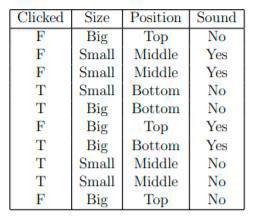

## 2. Naive Base (10 points)
For the same data Using Naïve Base what is the prediction of the new Sample $(big,Middle,No)$.

# 3. Understanding (16 points)
1.  Describe the analytical solution for linear regression with MSE as a distance function. (4 points)
2. What is the problem with information gain? Describe any solution for it. (4 points)
3. Why do we use Gradient Descent or Neotun Roffson for Linear Regression? (4 points)
4. Explain how a Decision tree is used for regression problems. (4 points)

# Code

## Import All Packages
Add all imports needed for this notebook to run

# Titanic Dataset
The famous Titanic dataset includes 1309 passengers with nine attributes.
In the following question, we will use seven features to classify whether this passenger survived.  
Please use the given dataset and not from another source.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

# 1.Logistic regression vs classification tree (19 Points)

Make the classification using  models Logistic regression and Decsion tree models.  
Usr sklearn: sklearn.linear_model.LogisticRegression, sklearn.tree.DecisionTreeClassifier

*   Load the data.
*   Deal with missing values. (5 points)
*   Split Train-Test 20:80 using sklearn.model_selection:train_test_split. (3 pints)
*   Apply Logistic regression. (5 points)
*   Apply Descion tree with max_depth=6 (5 points).
*   Calculate the Acuracey using  sklearn.metrics:accuracy_score. (1 points)


In [ ]:
def PRINT(text) -> None: print(f"{'-'*80}\n{text}\n{'-'*80}")

## Load the Data ##

In [ ]:
#Load Data
titanic_df = pd.read_csv('Titanic.csv')

PRINT('Loaded Titanic Data Successfully!')
titanic_df.head()

--------------------------------------------------------------------------------
Loaded Titanic Data Successfully!
--------------------------------------------------------------------------------


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0.0,3.0,2.0,0
1,2,38.0,71.2833,1,1,0.0,1.0,0.0,1
2,3,26.0,7.9250,1,0,0.0,3.0,2.0,1
3,4,35.0,53.1000,1,1,0.0,1.0,2.0,1
4,5,35.0,8.0500,0,0,0.0,3.0,2.0,0


In [ ]:
PRINT(f'Data frame shape (rows, columns) -> {titanic_df.shape}')
PRINT(f'Columns -> {list(titanic_df.columns)}')

--------------------------------------------------------------------------------
Data frame shape (rows, columns) -> (1309, 9)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Columns -> ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', 'Survived']
--------------------------------------------------------------------------------


## Dead with Missing Values ##

In [ ]:
rows_with_null_values_in_df = titanic_df.isnull().sum()
num_of_null_rows = titanic_df.isnull().sum().sum()
PRINT(f'Visualize rows with null values in titanic_df:\n\n{rows_with_null_values_in_df}\n\nTotal: {num_of_null_rows}')

--------------------------------------------------------------------------------
Visualize rows with null values in titanic_df:

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          1
Pclass         2
Embarked       3
Survived       0
dtype: int64

Total: 6
--------------------------------------------------------------------------------


In [ ]:
# Generate new data frame with the "clean data"
titanic_df_dropped = titanic_df.dropna(axis=0)

# Counting the number of rows dropped
number_of_rows_dropped = len(titanic_df) - len(titanic_df_dropped)

# Drop null values from our data frame
titanic_df.dropna(axis=0, inplace=True, ignore_index=True)

PRINT(f"Number of null values before dropping:  {num_of_null_rows}")
PRINT(f"Number of rows dropped: {number_of_rows_dropped}")

--------------------------------------------------------------------------------
Number of null values before dropping:  6
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Number of rows dropped: 6
--------------------------------------------------------------------------------


In [ ]:
PRINT(f'Shape check after dropping null values: {titanic_df.shape}')

--------------------------------------------------------------------------------
Shape check after dropping null values: (1303, 9)
--------------------------------------------------------------------------------


## Split the Data ##

In [ ]:
features = ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']
labels = ['Survived']

X = titanic_df[features]
y = titanic_df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)
PRINT(f'Splitted the Data Successfully !')

--------------------------------------------------------------------------------
Splitted the Data Successfully !
--------------------------------------------------------------------------------


In [ ]:
PRINT(f'Train & Test shapes (num_rows, num_columns):\n\nX_train: {X_train.shape}, y_train: {X_train.shape}\nX_test: {X_test.shape}, y_test: {y_test.shape}')

--------------------------------------------------------------------------------
Train & Test shapes (num_rows, num_columns):

X_train: (1042, 8), y_train: (1042, 8)
X_test: (261, 8), y_test: (261, 1)
--------------------------------------------------------------------------------


## Logistic Regression Model ##

In [ ]:
# Generate instance of LogisticRegression model
logistic_model = LogisticRegression()

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict on the testing set
logistic_predictions = logistic_model.predict(X_test)

PRINT(f'Done Training & Predicting using Logistic Regression !')


--------------------------------------------------------------------------------
Done Training & Predicting using Logistic Regression !
--------------------------------------------------------------------------------


## Decision Tree Model ##

In [ ]:
# Generate instance of DecisionTreeClassifier model
tree_model = DecisionTreeClassifier(max_depth=6)

# Train the model on the training set
tree_model.fit(X_train, y_train)

# Predict on the testing set
tree_predictions = tree_model.predict(X_test)

PRINT(f'Done Training & Predicting using Decision Tree Classifier !')

--------------------------------------------------------------------------------
Done Training & Predicting using Decision Tree Classifier !
--------------------------------------------------------------------------------


## Calculate the Accuracy ##

In [ ]:
# Calculate accuracy for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Calculate accuracy for Decision Tree
tree_accuracy = accuracy_score(y_test, tree_predictions)

PRINT(f"Accuracy for Logistic Regression: {logistic_accuracy:.5f}")
PRINT(f"Accuracy for Decision Tree: {tree_accuracy:.5f}")

--------------------------------------------------------------------------------
Accuracy for Logistic Regression: 0.87356
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy for Decision Tree: 0.87356
--------------------------------------------------------------------------------


# 2.PreProning (15 Points)
For the same problem described above:
*   Find the best max depth in the range [1,8] of the decision tree using the function sklearn.model_selection.GridSearchCV.


In [ ]:
dt_grid = {'max_depth': range(1, 9)}

# Generate instance of DecisionTreeClassifier model
tree_model = DecisionTreeClassifier()

# Generate instance of GridSearchCV in order to find the best `max_depth` & fit it
grid_search = GridSearchCV(estimator=tree_model, param_grid=dt_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extract the parameters
best_max_depth = grid_search.best_params_['max_depth']


PRINT(f"Best max depth found by cross validation grid search: {best_max_depth}")

--------------------------------------------------------------------------------
Best max depth found by cross validation grid search: 4
--------------------------------------------------------------------------------


# 3.Entropy vs Gini (10 Points)
For the same problem described above:

*   Use max_depth From question 2.
*   Train the model with Entropy. (5 points)
*   Train the model with Gini. (5 points)
*   Using Accuracy score who is better? (5 points)

In [ ]:
#Q3

# Generate instance of DecisionTreeClassifier using entropy to measure the quality of the split
tree_entropy_model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
# Train the model on the training dataset
tree_entropy_model.fit(X_train, y_train)
# Generate prediction on the testing dataset
entropy_predictions = tree_entropy_model.predict(X_test)

# Generate instance of DecisionTreeClassifier using Gini to measure the quality of the split
tree_gini_model = DecisionTreeClassifier(max_depth=6, criterion='gini')
# Train the model on the training dataset
tree_gini_model.fit(X_train, y_train)
# Generate prediction on the testing dataset
gini_predictions = tree_gini_model.predict(X_test)


# Calculate accuracy score for models trained with Entropy and Gini
entropy_accuracy = accuracy_score(y_test, entropy_predictions)
gini_accuracy = accuracy_score(y_test, gini_predictions)

PRINT(f"Accuracy for Entropy:  {entropy_accuracy:.4f}")
PRINT(f"Accuracy for Gini impurity: {gini_accuracy:.4f}")

--------------------------------------------------------------------------------
Accuracy for Entropy:  0.9119
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy for Gini impurity: 0.8697
--------------------------------------------------------------------------------


Using the accuracy score metric, it is evident that employing entropy to determine the quality of each split resulted in better performance than using Gini.

# 4. Gradient Descent (15 points)

* Assume we have $𝑓(𝑥,𝑦) = 𝑥^2/29+𝑦^2/64$
* Use gradient descent to find local minima, start at $(8.5,8.6)$
* Make 1000 Iteration.

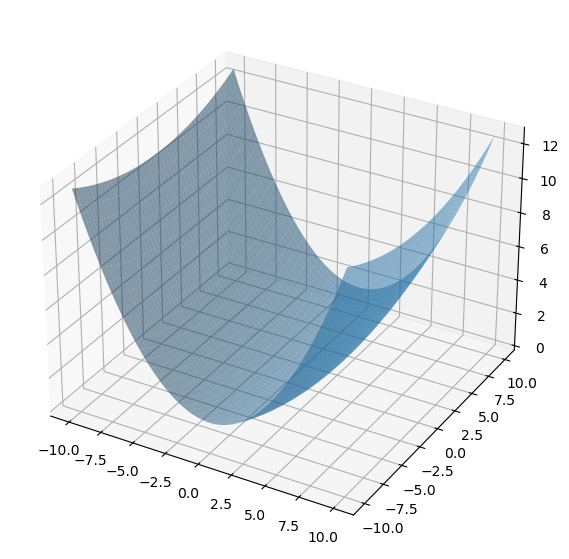

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x,y):
  return np.power(x,2)/9 + np.power(y,2)/64

x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt. figure(figsize=(7, 7))
ax = plt.axes (projection='3d' )
ax. plot_surface(X, Y, Z, alpha=0.5)

## Helper Function For Question 4 ##

In [ ]:
def grad_func(x, y):
    return np.array([2*x / 29, 2*y / 64])

In [ ]:
def gradient_descent(starting_point, learning_rate, num_iterations):
    x_current, y_current = starting_point
    trajectory = [starting_point]

    for _ in range(num_iterations):
        grad = grad_func(x_current, y_current)
        x_current -= learning_rate * grad[0]
        y_current -= learning_rate * grad[1]
        trajectory.append((x_current, y_current))

    return [np.array(trajectory), x_current, y_current]

In [ ]:
starting_point = np.array([8.5, 8.6])
learning_rate = 0.1
num_iterations = 1000

# Call `gradient_descent` helper function in order to preforme gradient descent
res = gradient_descent(starting_point, learning_rate, num_iterations)

In [ ]:
PRINT(f'The local minimum found using `learning_rate = 0.1` and `num_iterations=1000` hyperparameters:\n\n{(res[1], res[2])}')

--------------------------------------------------------------------------------
The local minimum found using `learning_rate = 0.1` and `num_iterations=1000` hyperparameters:

(0.008392836949127248, 0.3760132842861056)
--------------------------------------------------------------------------------


## Visualize the Result ##

In [ ]:
res = res[0]

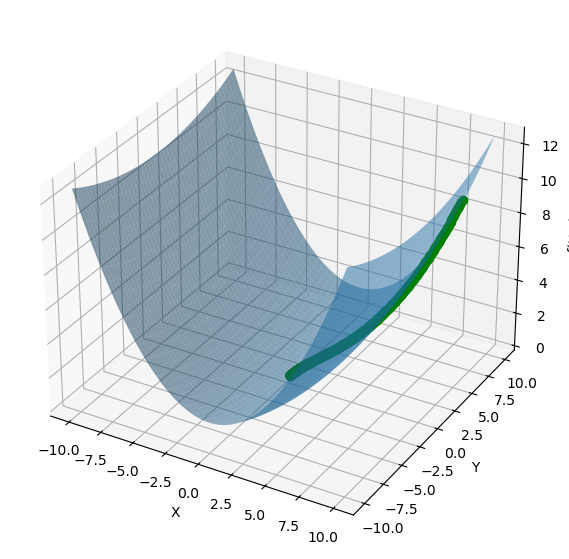

In [ ]:
x = y = np.arange(-10, 10, 0.005)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(res[:, 0], res[:, 1], func(res[:, 0], res[:, 1]), color='g', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
plt.show()